In [2]:
!pip install requests

  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
Using cached requests-2.32.4-py3-none-any.whl (64 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.5.0-py3-none-any.whl (129 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [requests]4/5 [requests]


In [68]:
!pip install matplotlib

In [ ]:
import requests

url = "https://raw.githubusercontent.com/karpathy/makemore/master/names.txt"
response = requests.get(url)
words = response.text.splitlines()

: 

In [ ]:
words[:5]

: 

In [ ]:
min(len(w)for w in words)


: 

In [ ]:
count=0
for i in range(len(words)):
    if len(words[i])==15:
        print(words[i])
        count+=1
print(count)

: 

In [ ]:
b={}
for w in words:
    #print(type(list(w)))
    chs= ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs,chs[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram,0) + 1
        # So our key here is a unique tuple, whereas the value is the count of each bigram
        # We initialize it with 0
        #print(ch1,ch2)

: 

In [ ]:
import torch 

: 

In [ ]:
N=torch.zeros((27,27), dtype=torch.int32)

: 

In [11]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos = {i:s for s,i in stoi.items()}


In [12]:
# Instead of using 2 tokens for the operation now we are going to use only a single token '.'
# This is logical and we do not actually need 2 tokens her for our use case
for w in words:
    #print(type(list(w)))
    chs= ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        N[ix1,ix2]+=1

In [13]:
import matplotlib.pyplot as plt 
%matplotlib inline

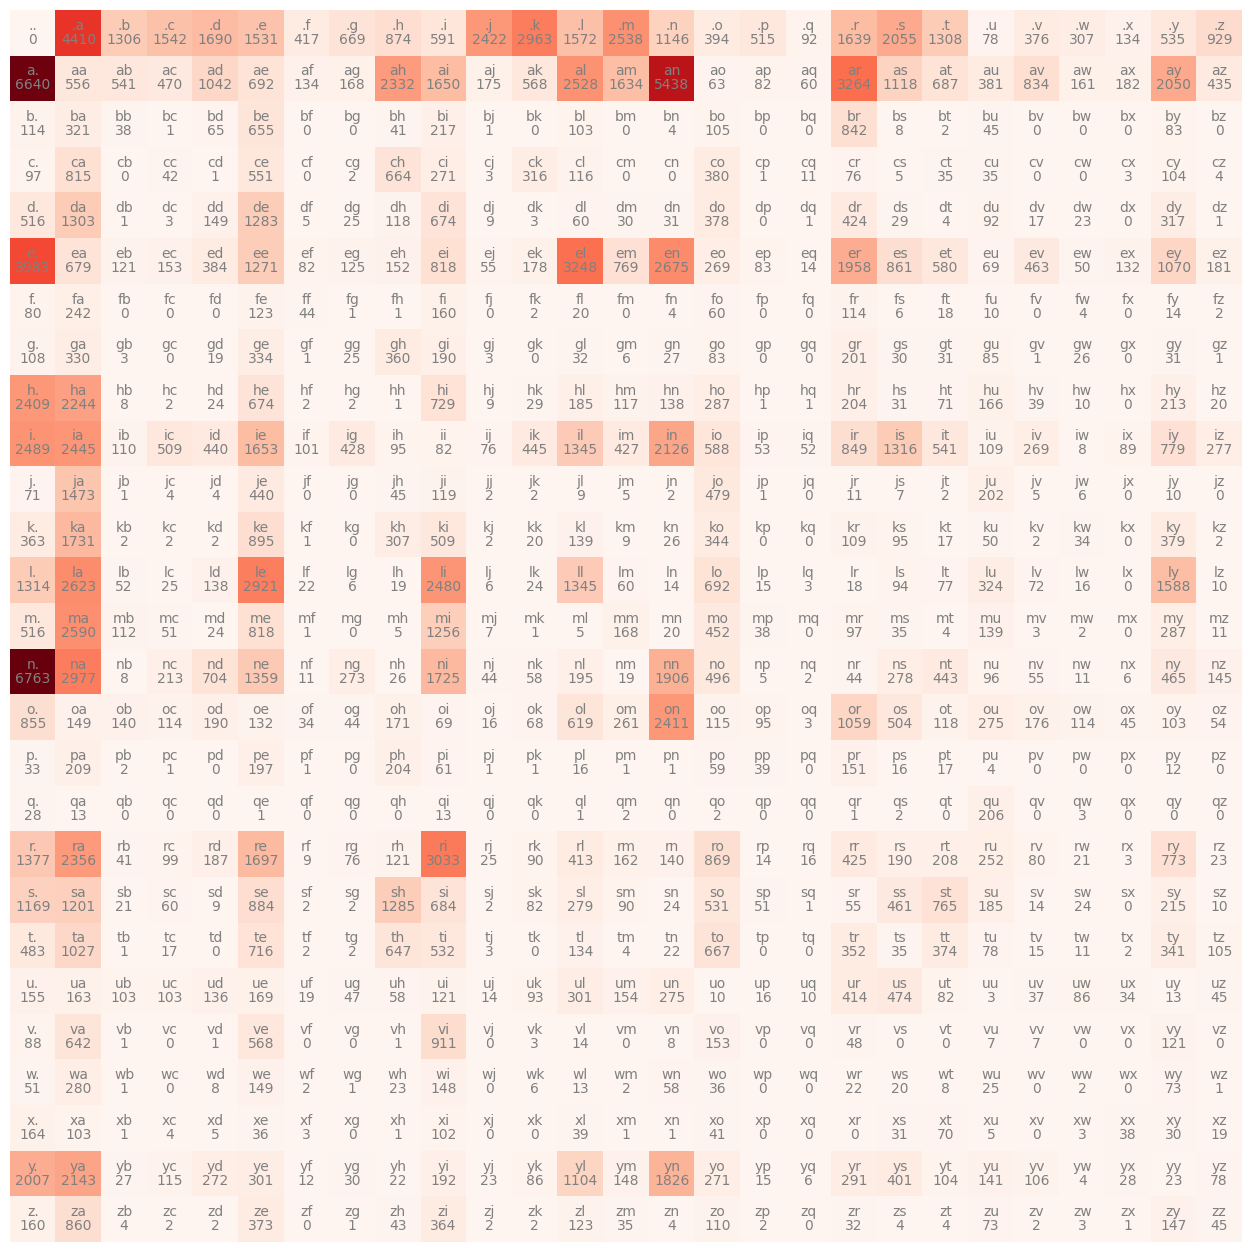

In [14]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Reds')

for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [15]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [32]:
p=N[0].float()
p=p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [33]:
ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
ix
itos[ix]

'p'

In [35]:
p=N[ix].float()
p=p/p.sum()
p

tensor([0.0322, 0.2037, 0.0019, 0.0010, 0.0000, 0.1920, 0.0010, 0.0000, 0.1988,
        0.0595, 0.0010, 0.0010, 0.0156, 0.0010, 0.0010, 0.0575, 0.0380, 0.0000,
        0.1472, 0.0156, 0.0166, 0.0039, 0.0000, 0.0000, 0.0000, 0.0117, 0.0000])

In [36]:
ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
ix
itos[ix]

'a'

In [156]:
P=(N+1).float()
P=P/P.sum(1,keepdim=True)
#the operation performable
# P.shape= [27,27]
# P.sum(1,keepdim).shape=[27,1]
# so pytorch stretches the P.suma array out to perform the operation

# 

In [131]:
P.shape

torch.Size([27, 27])

In [73]:
name=['.']

In [47]:
a+list(itos[ix])

['x', 'a']

In [274]:
g= torch.Generator().manual_seed(2147483647)
for i in range(10): 
    ix=0
    name=['']
    while True:
        P[ix]=p
        ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        ix
        p=N[ix].float()
        p=p/p.sum()
        add=list(itos[ix])
        name= name +add
        if ix == 0:
            break;
    print(''.join(name))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


In [183]:
log_likelihood= 0.0
n=0
for w in ['emma']:
    chs = ['.'] + list(w)+ ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        logprob= torch.log(prob)
        log_likelihood+=logprob
        n+=1
        print(f'{ch1}{ch2}: {prob:.4f}{logprob:.4f}')
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

.e: 0.0478-3.0408
em: 0.0377-3.2793
mm: 0.0253-3.6772
ma: 0.3899-0.9418
a.: 0.1960-1.6299
log_likelihood=tensor(-12.5690)
nll=tensor(12.5690)
2.513798236846924


In [ ]:
#Now using log likelihood to we can tell the probability of each output.
#we added +1 to all samples so that we do not get a log probability of infinity.


# Neural Network

In [245]:
xs=[]
ys=[]
for w in words[:1]:
    chs = ['.'] + list(w)+ ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        #print(ch1,ch2)
xs= torch.tensor(xs)
ys= torch.tensor(ys)

#how can a neural network be better than the probability distribution in this case

In [246]:
#xs,ys

In [247]:
#One hot encoding
import torch.nn.functional as F 
xenc = F.one_hot(xs,num_classes=27).float()
#xenc

In [248]:
xenc.dtype

torch.float32

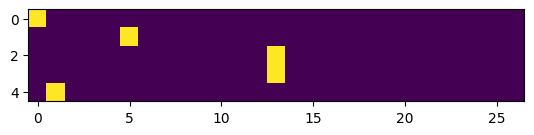

In [249]:
plt.imshow(xenc)

In [250]:
# sampling W from standard normal distribution
W= torch.randn((27,27))
(xenc @ W).shape  

torch.Size([5, 27])

In [251]:
logits= xenc @ W
# Applying softmax algorithm
counts=logits.exp()
probs= counts/ counts.sum(1,keepdims=True)
#probs
probs.shape

torch.Size([5, 27])

In [255]:
W

tensor([[-5.3009e-01, -1.1950e+00, -1.2947e+00,  2.8746e-01,  6.8441e-01,
         -6.2292e-02, -9.5137e-01, -6.8224e-01,  1.2931e+00, -6.6836e-01,
         -1.6634e-01, -1.3882e+00, -1.2028e+00, -5.2663e-01,  7.0207e-01,
         -9.6684e-01,  1.8009e-01, -2.4571e-01, -2.6568e-01, -5.4862e-01,
          3.7018e-01, -1.4994e+00, -7.2433e-01, -1.5575e-01,  4.8790e-01,
         -5.9550e-01,  3.7634e-02],
        [ 1.7782e+00, -2.7207e-01, -1.2286e+00,  5.8710e-01, -1.2373e+00,
          3.8123e-01, -7.3564e-01,  1.2739e+00, -5.4007e-01, -6.4042e-01,
          5.4040e-01, -1.5627e+00,  1.0066e+00,  7.8480e-02,  1.5006e+00,
          1.8497e-01,  1.3687e+00,  1.5997e+00,  1.9820e-02,  9.6568e-02,
         -4.1184e-01,  1.1432e+00,  3.5950e-01, -8.7133e-01, -5.8610e-01,
          1.0282e+00, -1.2500e+00],
        [-1.2677e+00,  1.1471e-01, -3.1279e-01, -1.1873e+00,  6.9782e-01,
         -5.7563e-01,  1.2638e+00,  1.0252e+00,  1.0428e+00,  1.7645e-01,
         -1.6301e+00, -8.4944e-01,  1.42

In [253]:
probs

tensor([[0.0241, 0.0124, 0.0112, 0.0546, 0.0812, 0.0385, 0.0158, 0.0207, 0.1493,
         0.0210, 0.0347, 0.0102, 0.0123, 0.0242, 0.0827, 0.0156, 0.0491, 0.0320,
         0.0314, 0.0237, 0.0593, 0.0091, 0.0199, 0.0351, 0.0667, 0.0226, 0.0425],
        [0.0106, 0.0104, 0.0247, 0.0155, 0.0027, 0.0174, 0.0242, 0.0301, 0.0145,
         0.0448, 0.0816, 0.0025, 0.0135, 0.0616, 0.0483, 0.0858, 0.0142, 0.0058,
         0.0438, 0.0142, 0.0149, 0.1074, 0.0852, 0.0864, 0.0178, 0.1032, 0.0190],
        [0.0218, 0.0137, 0.0478, 0.0247, 0.1253, 0.0102, 0.0243, 0.0267, 0.0978,
         0.0369, 0.0310, 0.0726, 0.0260, 0.0122, 0.0262, 0.0349, 0.0699, 0.0648,
         0.0169, 0.0062, 0.0500, 0.0224, 0.0238, 0.0264, 0.0370, 0.0108, 0.0399],
        [0.0218, 0.0137, 0.0478, 0.0247, 0.1253, 0.0102, 0.0243, 0.0267, 0.0978,
         0.0369, 0.0310, 0.0726, 0.0260, 0.0122, 0.0262, 0.0349, 0.0699, 0.0648,
         0.0169, 0.0062, 0.0500, 0.0224, 0.0238, 0.0264, 0.0370, 0.0108, 0.0399],
        [0.1248, 0.0161,

In [257]:
# loss function for the first combination of alphabets
log_likelihood=0
n=0
prob=0
for i in range(0,5):
    
    y=ys[i].item()
    prob=probs[i,y]
    logprob= torch.log(prob)
    log_likelihood+=logprob
    n+=1
    print(f'{prob:.4f}  {logprob:.4f}')
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'loss= {nll/n}')
# so it should come out to be 0.0343
# lets see what it comes out to beb


0.0385  -3.2572
0.0616  -2.7869
0.0122  -4.4031
0.0137  -4.2933
0.1248  -2.0807
log_likelihood=tensor(-16.8213)
nll=tensor(16.8213)
loss= 3.3642547130584717


In [ ]:
W= torch.randn((27,27))
(xenc @ W).shape  


In [262]:
logits= xenc @ W
# Applying softmax algorithm
counts=logits.exp()
probs= counts/ counts.sum(1,keepdims=True)
loss=-probs[torch.arange(num),ys].log().mean()


NameError: name 'num' is not defined

In [107]:
g= torch.Generator()


In [134]:
#understand broadcasting well to understand this.

In [22]:
torch.multinomial(p,num_samples=100, replacement=True, generator=g)


tensor([2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2,
        1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2,
        2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2,
        2, 2, 1, 2])

In [50]:
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [ ]:
#print(b)

{('<S>', 'e'): 11, ('e', 'm'): 11, ('m', 'm'): 11, ('m', 'a'): 11, ('a', '<E>'): 12, ('<S>', 'o'): 11, ('o', 'l'): 11, ('l', 'i'): 11, ('i', 'v'): 11, ('v', 'i'): 11, ('i', 'a'): 11}


In [264]:
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [270]:
# gradient descent
for k in range(500):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

2.4897916316986084
2.489628314971924
2.489469528198242
2.489314079284668
2.4891624450683594
2.4890148639678955
2.48887038230896
2.48872971534729
2.4885921478271484
2.4884581565856934
2.4883267879486084
2.488198757171631
2.4880735874176025
2.4879510402679443
2.4878313541412354
2.487715005874634
2.487600564956665
2.4874892234802246
2.487379312515259
2.4872729778289795
2.487168550491333
2.4870662689208984
2.486966371536255
2.486868381500244
2.4867727756500244
2.4866788387298584
2.4865872859954834
2.486497163772583
2.4864094257354736
2.486323118209839
2.486238718032837
2.4861562252044678
2.4860751628875732
2.4859957695007324
2.4859180450439453
2.485841989517212
2.485767126083374
2.4856936931610107
2.485621929168701
2.4855518341064453
2.4854824542999268
2.485414981842041
2.4853484630584717
2.485283136367798
2.4852190017700195
2.485156536102295
2.4850947856903076
2.485034465789795
2.4849750995635986
2.484917163848877
2.4848599433898926
2.4848034381866455
2.484748601913452
2.484694480895996
2

In [272]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

cexze.
momasurailezityha.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


In [ ]:
#Result from probability based modeling
'''cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
'''
#The amazing thing is that we get the same names form both of the algorithms. Because if you think about it the neural network is trying to predict the same probability distribution
#

'cexze.\nmomasurailezitynn.\nkonimittain.\nllayn.\nka.\nda.\nstaiyaubrtthrigotai.\nmoliellavo.\nke.\nteda.\n'